# Time Series Analysis and forecasting using ARIMA

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import os

In [2]:
df = pd.read_csv("LA_Flight_Fare.csv")

In [3]:
df.head()

,Month,"Los Angeles Flight Fare($) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Month                                                             115 non-null    object
 1   Los Angeles Flight Fare($) January 1973 through June 1982, n=114  115 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


From this I can infer two necessary things:
1. I really need to change change columns name
2. Both the columns have object datatype

In [5]:
df.describe()

,Month,"Los Angeles Flight Fare($) January 1973 through June 1982, n=114"
count,115,115
unique,115,112
top,1960-01,1152
freq,1,2


In [6]:
df.columns = ["month", "average_monthly_fare"]
df.head()

,month,average_monthly_fare
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [7]:
df.dtypes

month                   object
average_monthly_fare    object
dtype: object

In [8]:
df['average_monthly_fare'].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327', nan, ' n=114'], dtype=object)

We can see here that this series consist an anamolous data which is the last one.

In [9]:
df = df.drop(df.index[df['average_monthly_fare'] == 'n=114'])

In [10]:
df['average_monthly_fare'].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327', nan, ' n=114'], dtype=object)

In [11]:
print(df[df['average_monthly_fare'].isnull()])


    month average_monthly_fare
114   NaN                  NaN


In [12]:
df['average_monthly_fare'] = pd.to_numeric(df['average_monthly_fare'], errors='coerce')
# error = coerce -> invalid parsing will be set as NaN

In [13]:
df = df.dropna(subset=['average_monthly_fare'])

Now our data is clean !!!

In [14]:
df['average_monthly_fare'] = df['average_monthly_fare'].astype(np.int32)

In [15]:
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')

In [16]:
df.dtypes

month                   datetime64[ns]
average_monthly_fare             int32
dtype: object

# Time Series Analysis



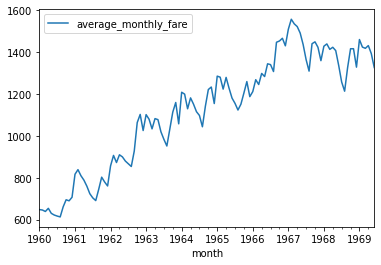

In [17]:
# Normal line plot so that we can see data variation
# We can observe that average number of riders is increasing most of the time
# We'll later see decomposed analysis of that curve
df.plot.line(x = 'month', y = 'average_monthly_fare')
plt.show()

## Ploting monthly variation of dataset
It gives us idea about seasonal variation of our data set

In [18]:
to_plot_monthly_variation = df

In [19]:
# only storing month for each index 
mon = df['month']

In [20]:
# decompose yyyy-mm data-type 
temp= pd.DatetimeIndex(mon)

In [21]:
# assign month part of that data to ```month``` variable
month = pd.Series(temp.month)

In [22]:
# dropping month from to_plot_monthly_variation
to_plot_monthly_variation = to_plot_monthly_variation.drop(['month'], axis = 1)

In [23]:
# join months so we can get month to average monthly fare mapping
to_plot_monthly_variation = to_plot_monthly_variation.join(month)

In [24]:
# A quick glance
to_plot_monthly_variation.head()

,average_monthly_fare,month
0,648,1
1,646,2
2,639,3
3,654,4
4,630,5


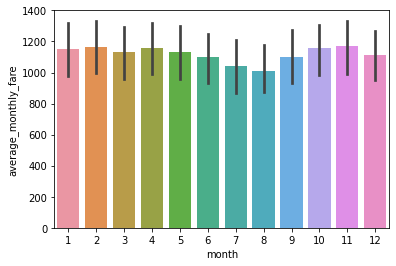

In [25]:
# Plotting bar plot for each month
sns.barplot(x = 'month', y = 'average_monthly_fare', data = to_plot_monthly_variation)
plt.show()

Well this looks tough to decode. Data is too sparse for this graph to represent any pattern. Hence it  cannot represents monthly variation effectively.In such a scenerio we can use our traditional scatter plot to understand pattern in dataset

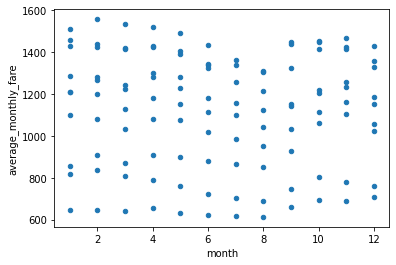

In [26]:
to_plot_monthly_variation.plot.scatter(x = 'month', y = 'average_monthly_fare')
plt.show()

We can see here the yearly variation of data in this plot. To understand this curve more effectively first look at the every row from bottom to top and see each year's variation.To understand yearly variation take a look at each column representing a  month.

Another tool to visualize the data is the seasonal_decompose function in statsmodel. With this, the trend and seasonality become even more obvious.

In [27]:
rider = df[['average_monthly_fare']]

## Trend Analysis

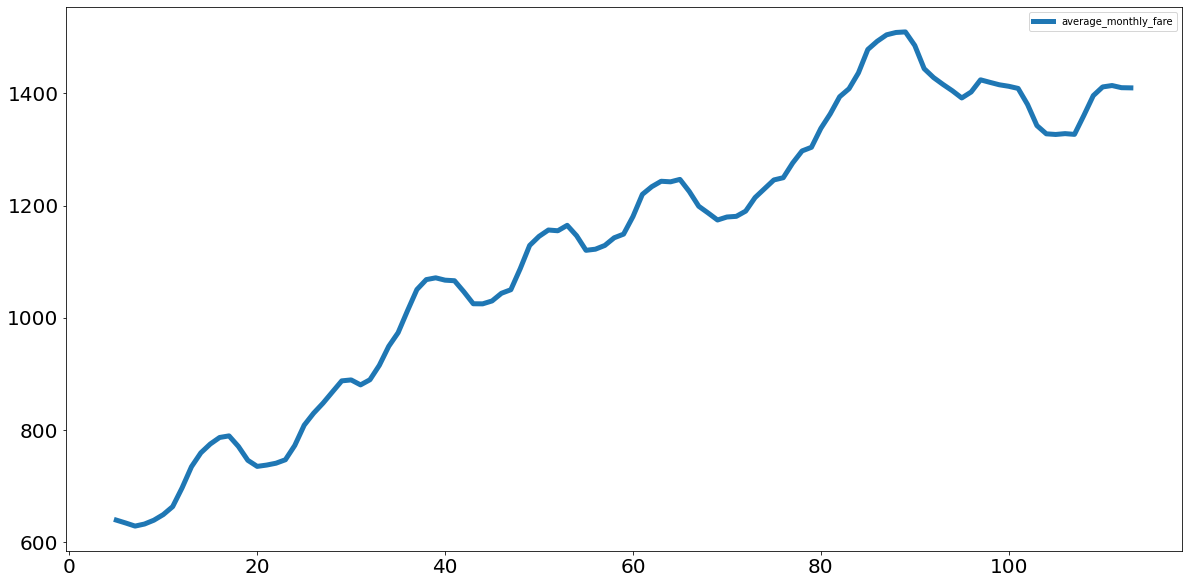

In [28]:
rider.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

For trend analysis, we use smoothing techniques. In statistics smoothing a data set means to create an approximating function that attempts to capture important patterns in the data, while leaving out noise or other fine-scale structures/rapid phenomena. 

## Seasonability Analysis


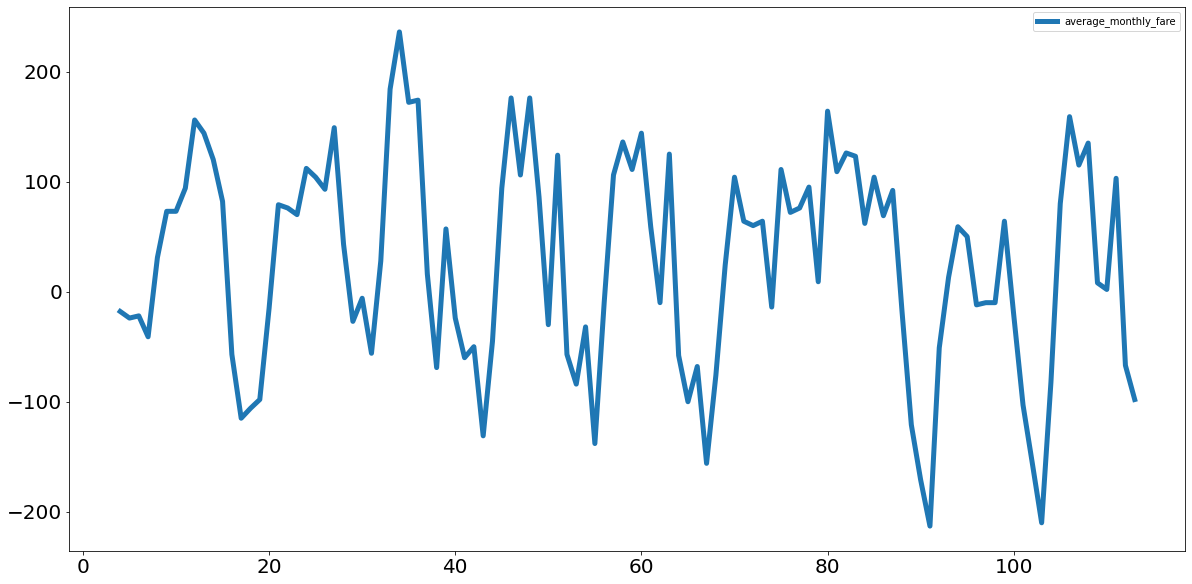

In [29]:
rider.diff(periods=4).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

## [Periodicity and Autocorrelation]

Auto correlation is the most famous way to understand seasonal variation till now. We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.In this plot vertical axis is represented by the following equations:-

> $C_n = \sum_{t = 1}^{n - h} (y(t) - \hat{y}) (y(t + n) - \hat{y}) / n$

> $C_0 = \sum_{t = 1}^{n} (y(t) - \hat{y})^2 / n$

Horizontal axis represents time lag(previous time steps)  h

C:\Users\athar\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


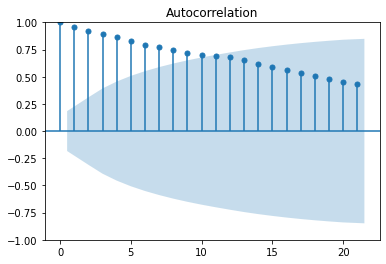

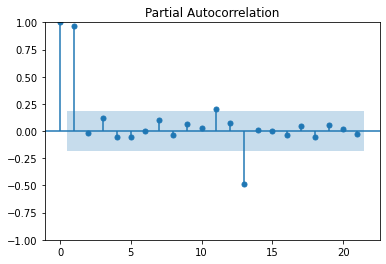

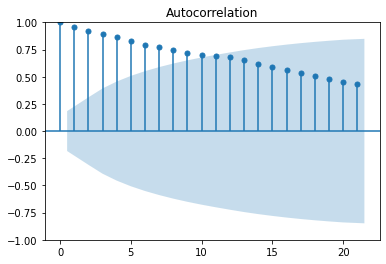

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(df['average_monthly_fare'],)
plot_acf(df.average_monthly_fare)

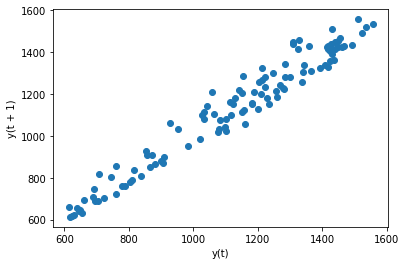

In [32]:
pd.plotting.lag_plot(df['average_monthly_fare'])
plt.show()

The above curve represents the relation between current time stepp and its previous time step

In [33]:
df = df.set_index('month')

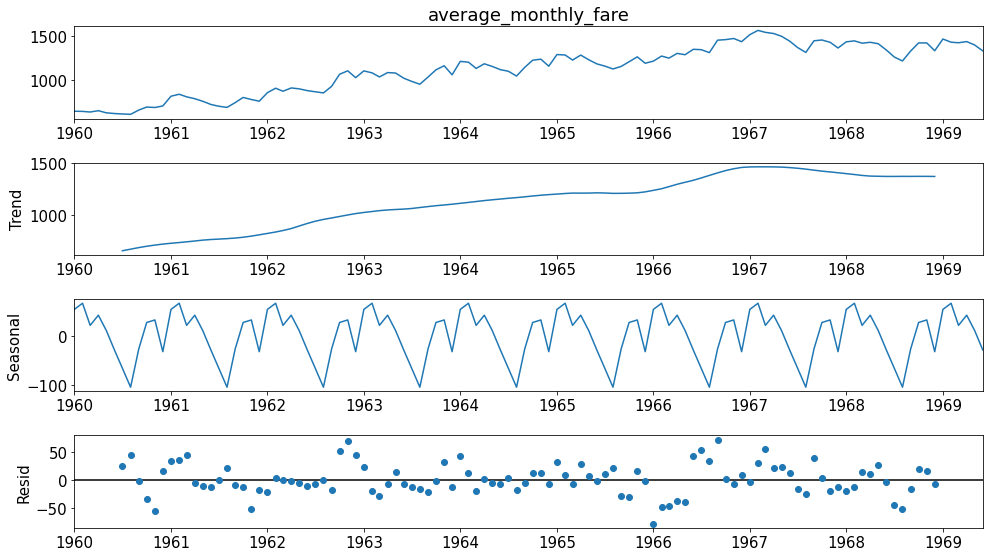

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(df.average_monthly_fare,model='additive')
fig = result.plot()

In [35]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.average_monthly_fare.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.536597
p-value: 0.515336


In [48]:
# Applying Seasonal ARIMA model to forcast the data 
mod = sm.tsa.statespace.SARIMAX(df['average_monthly_fare'], trend='n', order=(1,1,8), seasonal_order=(1,1,8,12))
results = mod.fit()
print(results.summary())

C:\Users\athar\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\athar\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\athar\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\athar\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to

                                     SARIMAX Results                                      
Dep. Variable:               average_monthly_fare   No. Observations:                  114
Model:             SARIMAX(1, 1, 8)x(1, 1, 8, 12)   Log Likelihood                -492.092
Date:                            Sat, 03 Dec 2022   AIC                           1022.184
Time:                                    18:17:46   BIC                           1071.871
Sample:                                01-01-1960   HQIC                          1042.299
                                     - 06-01-1969                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9097      0.410      2.219      0.027       0.106       1.713
ma.L1         -0.9568      2.238   

## To check your code

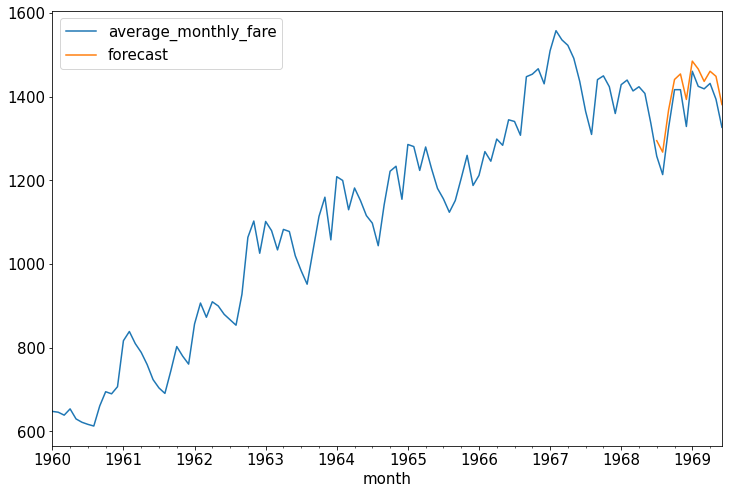

In [53]:
df['forecast'] = results.predict(start = 102, end= 120, dynamic= True)  
df[['average_monthly_fare', 'forecast']].plot(figsize=(12, 8))
plt.show()

## To generate future forcasts

In [50]:
def forcasting_future_months(df, no_of_months):
    df_perdict = df.reset_index()
    mon = df_perdict['month']
    mon = mon + pd.DateOffset(months = no_of_months)
    future_dates = mon[-no_of_months -1:]
    df_perdict = df_perdict.set_index('month')
    future = pd.DataFrame(index=future_dates, columns= df_perdict.columns)
    df_perdict = pd.concat([df_perdict, future])
    df_perdict['forecast'] = results.predict(start = 114, end = 125, dynamic= True)  
    df_perdict[['average_monthly_fare', 'forecast']].iloc[-no_of_months - 12:].plot(figsize=(12, 8))
    plt.show()
    return df_perdict[-no_of_months:]

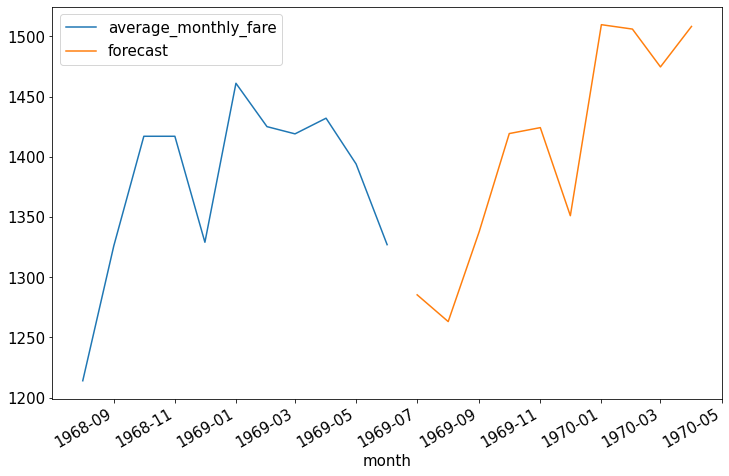

In [51]:
predicted = forcasting_future_months(df,10)

In [52]:
df.tail()

,average_monthly_fare,forecast
month,,
1969-02-01,1425,1466.511563
1969-03-01,1419,1436.793404
1969-04-01,1432,1461.033229
1969-05-01,1394,1448.904655
1969-06-01,1327,1381.469903


Thank You Group 04